# Machine Learning Project - Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from exploratory_analysis import *
from missing_values import *

## Get Data

In [2]:
path = '/Users/barganor/Downloads/XY_train (1).csv'

data = pd.read_csv(path)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


## Exploratory Data Analysis

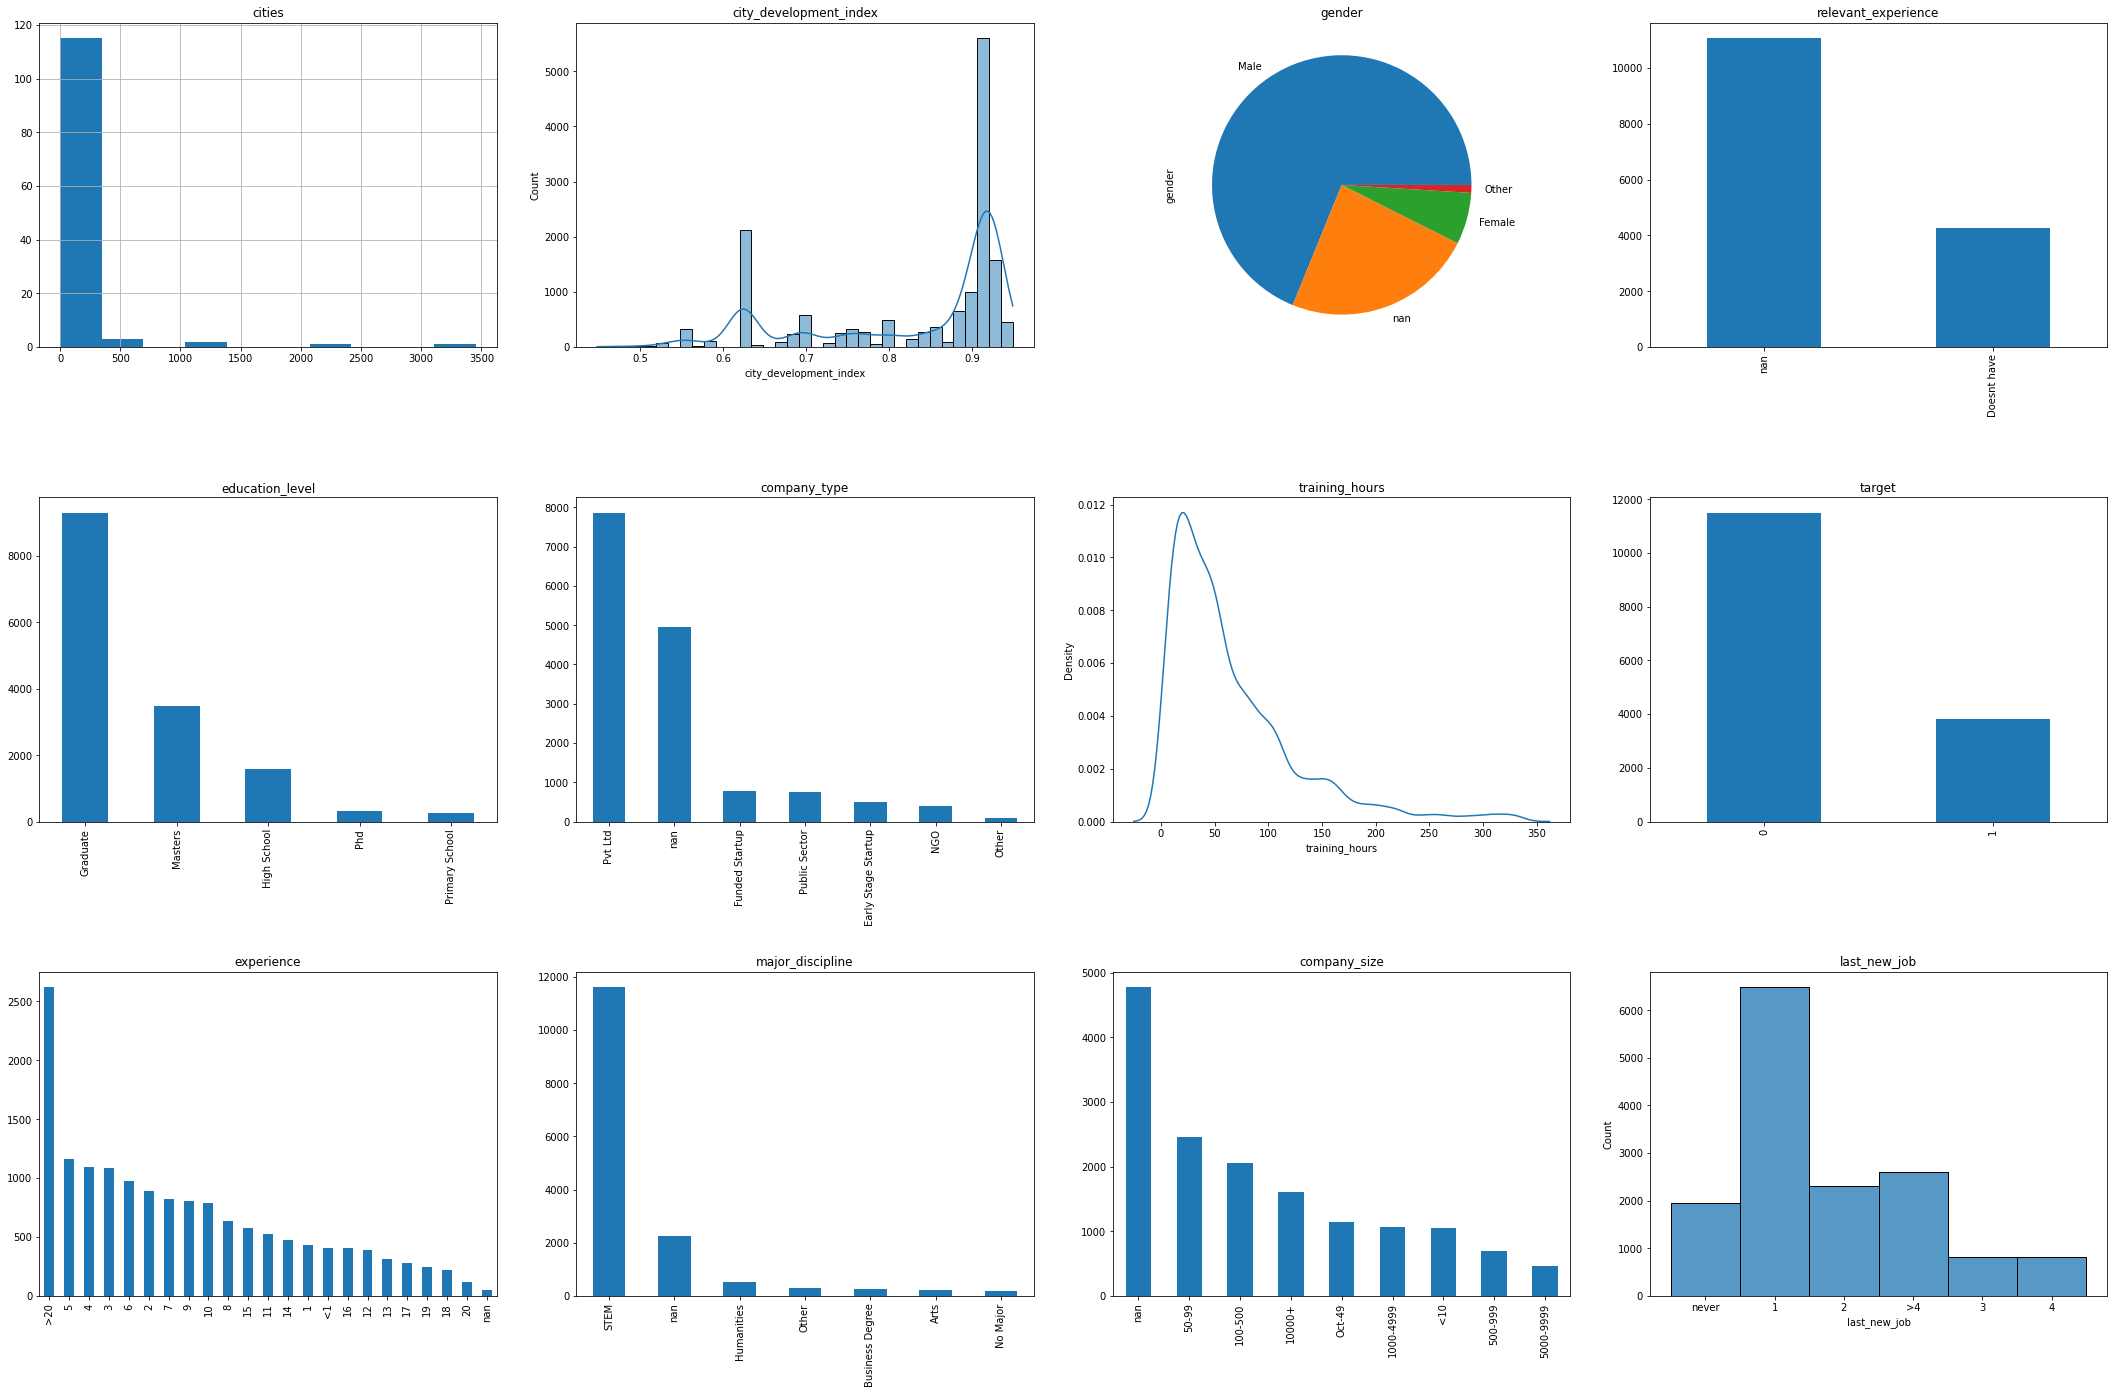

In [3]:
get_all_plots(data)

In [4]:

get_statistical_description(data)

,mean,std,50%,value_range
enrollee_id,16887.713167,9612.278744,17013.500,1.0 - 33380.0
city_development_index,0.829063,0.123161,0.903,0.448 - 0.949
training_hours,65.337466,60.007145,47.000,1.0 - 336.0
target,0.249576,0.432782,0.000,0.0 - 1.0


## Pre-Processing

In [5]:
processed_data = drop_nan_by_thresh(data, 12)

Number Of rows dropped: 2287
Number Of nan values dropped: 7852


#### Replace data with numeric

In [6]:
processed_data = replace_by_dict(processed_data, 'company_size')

Values before change  Values after change
                 <10                  1.0
              Oct-49                  2.0
               50-99                  3.0
             100-500                  4.0
             500-999                  5.0
           1000-4999                  6.0
           5000-9999                  7.0
              10000+                  8.0


In [7]:
processed_data = replace_by_dict(processed_data, 'last_new_job')

Values before change  Values after change
               never                  0.0
                   1                  1.0
                   2                  2.0
                   3                  3.0
                   4                  4.0
                  >4                  5.0


In [8]:
processed_data = replace_by_dict(processed_data, 'major_discipline')

Values before change  Values after change
                STEM                  0.0
          Humanities                  1.0
               Other                  2.0
     Business Degree                  3.0
                Arts                  4.0
            No Major                  5.0


In [9]:
processed_data = replace_by_dict(processed_data, 'experience')

Values before change Values after change
                  <1                   0
                   1                   1
                  10                  10
                  11                  11
                  12                  12
                  13                  13
                  14                  14
                  15                  15
                  16                  16
                  17                  17
                  18                  18
                  19                  19
                   2                   2
                  20                  20
                 >20                  25
                   3                   3
                   4                   4
                   5                   5
                   6                   6
                   7                   7
                   8                   8
                   9                   9


#### Dealing with missing values

In [10]:
processed_data = fill_nan_with_median(processed_data, 'experience')

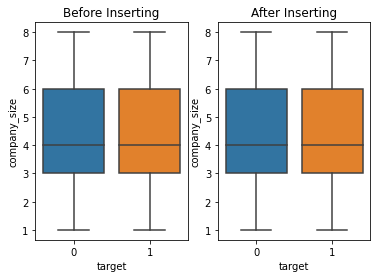

In [11]:
processed_data = fill_nan_with_probability(processed_data, 'company_size')

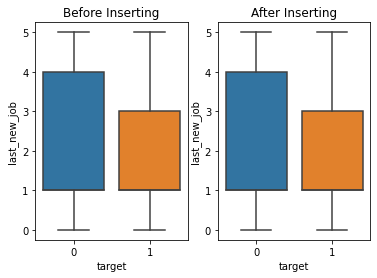

In [12]:
processed_data = fill_nan_with_probability(processed_data, 'last_new_job')

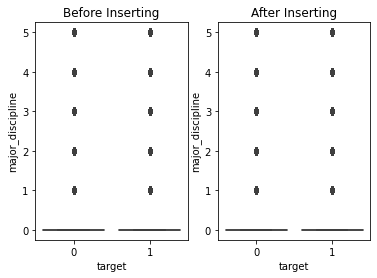

In [13]:
processed_data = fill_nan_with_probability(processed_data, 'major_discipline')

In [14]:
processed_data =  fill_nan_with_max_appear(processed_data, 'education_level')

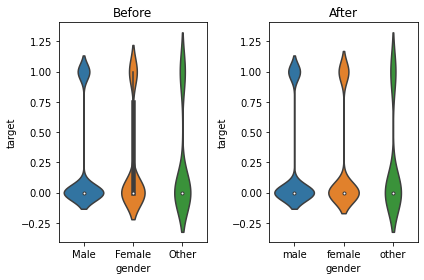

In [15]:
processed_data =fill_gender_with_knn(processed_data)

In [16]:
processed_data.isna().sum()

gender                       0
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
enrolled_university        105
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              2771
last_new_job                 0
training_hours               0
target                       0
dtype: int64